<a href="https://colab.research.google.com/github/Ferrariagustinpablo/DataScienceprojects/blob/main/Ames_house_price_prediction_Kaggle_competition_TPOT_RMSE_0_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ames Kaggle competition Link and imports

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
# Importing common used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
plt.style.use('ggplot')

# Importing dataset from Kaggle

In [ ]:
# Choose a the kaggle.json file downloaded from Kaggle.
from google.colab import files
files.upload()

# Create a kaggle file and put kaggle.json in it.
!mkdir -p ~/kaggle
!cp kaggle.json ~/.kaggle/

# Hide API account key.
!chmod 600 /root/.kaggle/kaggle.json

# kaggle datasets 
!kaggle competitions download -c house-prices-advanced-regression-techniques

Saving kaggle.json to kaggle (1).json
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 4.97MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 34.5MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.6MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 59.5MB/s]


In [ ]:
# Read train dataset
ames_train = pd.read_csv('/content/train.csv')

print('Dataset shape is: ', ames_train.shape)
display(ames_train.head())

# Read train dataset
ames_test = pd.read_csv('/content/test.csv')

print('Dataset shape is: ', ames_test.shape)
display(ames_test.head())


Dataset shape is:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dataset shape is:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Drop target feature from the train dataset 
ames_train.drop('SalePrice', inplace=True, axis=1)

# Create a columns to determine which row is train or test before concatenating
ames_train['train_test'] = 'train'
ames_test['train_test'] = 'test'

# Concatenate bioth 
ames = pd.concat([ames_train,ames_test])
print('ames shape is: ', ames_test.shape)
ames.head()

KeyError: ignored

# Handling missing values

In [ ]:
# Number of missing values for each column

def missing_cols(dataset):
  columns_missing_values = dataset.isna().sum().sort_values(ascending=False)
  columns_missing_values = columns_missing_values[columns_missing_values>0]
  return columns_missing_values

columns_missing_values = missing_cols(ames)
columns_missing_values

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
GarageArea         1
KitchenQual        1
GarageCars         1
BsmtFinSF1         1
Exterior2nd        1
SaleType           1
Electrical         1
dtype: int64

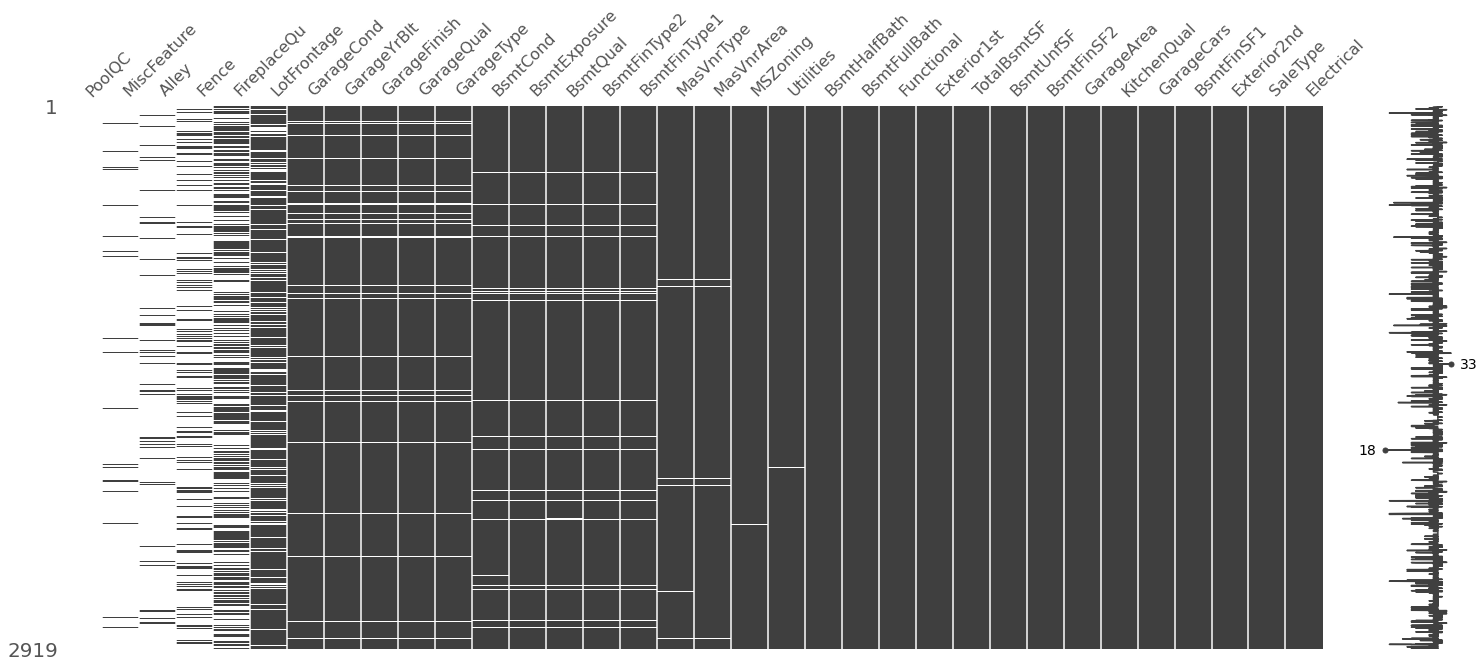

In [ ]:
# Visualize missingness matrix only for columns that found NaN values.
msno.matrix(ames[columns_missing_values.index])
plt.show()

## Dropping columns

As we can see for PoolQC, MiscFeature, Alley, Fence and FireplaceQ there are lot more missing values than actual values. We wouldn't be able to draw conclusions from those features.

For this columns I followed this steps:
- 1) Selected the columns that have more than 40% missing values.
- 2) Check if any of those are crucial to dataset.

PoolQC: Pool quality
MiscFeature: Miscellaneous feature not covered in other categories
Alley: Type of alley access
Fence: Fence quality
FireplaceQu: Fireplace quality

None of these features represent main information for the dataset.

- 3) Decision: Proceed eliminating the entire columns.

In [ ]:
# Select columns that have more than 40% missing values.
cols_to_drop = columns_missing_values[columns_missing_values> ames.shape[0]*.40].index
print(cols_to_drop)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')


In [ ]:
# Drop columns and show new dataset.
ames.drop(cols_to_drop, axis=1, inplace=True)
print(ames.shape)
ames.head()

(2919, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,train_test
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,train


In [ ]:
# Number of missing values for each column
columns_missing_values = missing_cols(ames)
columns_missing_values

LotFrontage     486
GarageYrBlt     159
GarageFinish    159
GarageCond      159
GarageQual      159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
Functional        2
BsmtFullBath      2
BsmtHalfBath      2
Utilities         2
Exterior2nd       1
BsmtFinSF2        1
Exterior1st       1
BsmtFinSF1        1
Electrical        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
SaleType          1
KitchenQual       1
GarageArea        1
dtype: int64

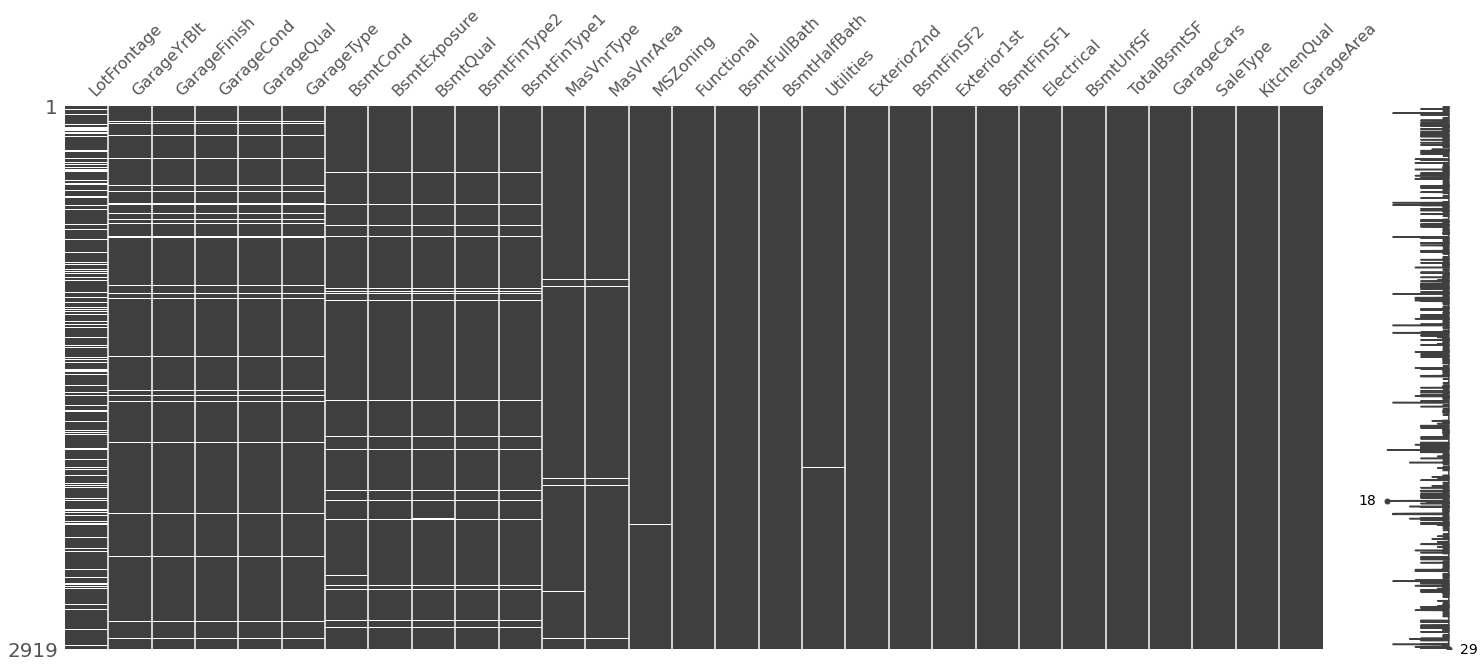

In [ ]:
# Visualize missingness matrix only for columns that found NaN values.
msno.matrix(ames[columns_missing_values.index])
plt.show()

## Missing Data Imputation using Regression for LotFrontage

We have to deal with LotFrontage values. It might be a useful feature, at this stage we don't know.

Imputing the missing data with a Measure of Central Tendency, we would under(over)estimate it. I wouldn't add any bias to my estimations.

For this float feature it's better to use a more accurate approach. Regression Imputation using LotArea, that is the Lot size in square feet.

In [ ]:
# Why LotFrontage? Is LotAreas highest correlation feature. 
ames.corr()['LotArea'].sort_values(ascending=False).head(2)

LotArea        1.000000
LotFrontage    0.489896
Name: LotArea, dtype: float64

In [ ]:
# Calculate a linear regression of the relationship.
lot_area_front = ames[['LotArea', 'LotFrontage']].dropna()

slope, intercept = np.polyfit(lot_area_front.LotArea, lot_area_front.LotFrontage, 1)

print('slope =', slope)
print('intercept =', intercept)

slope = 0.0017797941237565795
intercept = 51.99510362506275


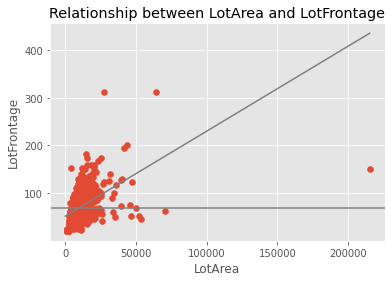

In [ ]:
# Show scatter plot for LotArea and LotFrontage
plt.scatter(ames.LotArea, ames.LotFrontage)
plt.title('Relationship between LotArea and LotFrontage')
plt.ylabel('LotFrontage')
plt.xlabel('LotArea')
plt.axhline(y=ames.LotFrontage.mean(), color='grey', linestyle='-', label='mean')

# Make theoretical line to plot
x = np.array([0, ames.LotArea.max()])
y = slope * x + intercept
plt.plot(x, y, color='grey')

plt.show()

We see in plot there is a relationship between those features, therefore it would me more accurate to impute NaN values through this regression instead of just a measure of central tendency.

In [ ]:
# For every LotFrontage nan value compute: 'LotFrontage' = slope * 'LotArea' + intercept
ames['LotFrontage'] = ames.apply(lambda x: slope * x['LotArea'] + intercept if pd.isnull(x['LotFrontage']) else x['LotFrontage'], axis=1)

# Check if LotFrontage has nan values
ames['LotFrontage'].isna().sum()

0

## Imputing Garage columns:

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

The missing values are because the house doesn't have a garage. Let's make a NA category as string.

In [ ]:
# Number of missing values for each column
columns_missing_values = missing_cols(ames)
columns_missing_values

GarageQual      159
GarageYrBlt     159
GarageFinish    159
GarageCond      159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
Functional        2
BsmtFullBath      2
BsmtHalfBath      2
Utilities         2
Exterior2nd       1
Exterior1st       1
BsmtFinSF2        1
Electrical        1
BsmtFinSF1        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
SaleType          1
KitchenQual       1
dtype: int64

In [ ]:
# I filter garage columns 
garage_columns = columns_missing_values[columns_missing_values > 150].index
print(garage_columns)

# Create a new category of 'NA' that means No garage, instead of NaN value.
for columns in garage_columns:
  ames[columns] = ames.apply(lambda x: 'NA' if pd.isnull(x[columns]) else x[columns], axis=1)

# Check if LotFrontage has nan values
ames[garage_columns].isna().sum()

Index(['GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageCond',
       'GarageType'],
      dtype='object')


GarageQual      0
GarageYrBlt     0
GarageFinish    0
GarageCond      0
GarageType      0
dtype: int64

## Mode imputation for all other columns

For the last columns we need to handle values, we are going to impute with mode.

In [ ]:
# Number of missing values for each column
columns_missing_values = missing_cols(ames)
columns_missing_values

BsmtExposure    82
BsmtCond        82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
MasVnrType      24
MasVnrArea      23
MSZoning         4
BsmtHalfBath     2
BsmtFullBath     2
Utilities        2
Functional       2
BsmtFinSF1       1
Exterior2nd      1
Exterior1st      1
BsmtUnfSF        1
BsmtFinSF2       1
KitchenQual      1
Electrical       1
TotalBsmtSF      1
SaleType         1
GarageCars       1
GarageArea       1
dtype: int64

In [ ]:
# Make an array of all columns to impute mode.
cols_impute_mode = columns_missing_values.index

for col in cols_impute_mode:
  ames[col] = ames[col].fillna(ames[col].mode()[0])

# Check last time if no missing values
if ames.isna().sum().sum() == 0:
  print("Nan values are handled, Let's continue!!")

Nan values are handled, Let's continue!!


# Target Variable analysis and transformation (y)

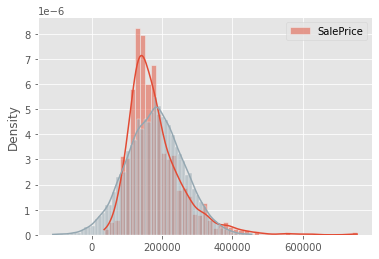

In [ ]:
from scipy.stats import norm
from scipy import stats

y = pd.read_csv('/content/train.csv', usecols=['SalePrice'])
normal = np.random.normal(y.mean(), y.std(), size=10000)

# Histplot:
sns.histplot(y, kde=True, stat='density', label='y')
sns.histplot(normal, kde=True, color='#94A7B1', stat='density', label='normal function')
plt.show()

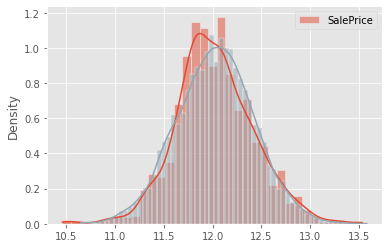

In [ ]:
# Fit y 
y = np.log1p(y)
normal = np.random.normal(y.mean(), y.std(), size=10000)

# Histplot:
sns.histplot(y, kde=True, stat='density', label='normal_y')
sns.histplot(normal, kde=True, color='#94A7B1', stat='density', label='normal function')
plt.show()

# Feature selection and engineering

## For Feature engineering on categorical columns see Feature Engineering of ames.ipynb

In [ ]:
cat_cols = []

for column in ames.columns:
  if ames[column].dtype == 'object':
    cat_cols.append(column)

print(cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'train_test']


In [ ]:
ames['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
# MS Zoning for C and RH merge into one category Other.
map_ms = {'C (all)': 'OTHER', 'FV': 'FV', 'RH': 'OTHER', 'RL': 'RL', 'RM': 'RM'}
ames['MSZoning2'] = ames['MSZoning'].map(map_ms)
ames['MSZoning2'].value_counts()

RL       2269
RM        460
FV        139
OTHER      51
Name: MSZoning2, dtype: int64

## mean encode

In [ ]:
train_ames_df = pd.read_csv('/content/train.csv')

In [ ]:
# Make dictionaries to map
dict_neighborhood = train_ames_df.groupby('Neighborhood')['SalePrice'].mean().to_dict()
dict_ext_1st = train_ames_df.groupby('Exterior1st')['SalePrice'].mean().to_dict()
dict_ext_2nd = train_ames_df.groupby('Exterior2nd')['SalePrice'].mean().to_dict()

# Map them all
ames['Neighborhood'] = ames['Neighborhood'].map(dict_neighborhood)
ames['Exterior1st'] = ames['Exterior1st'].map(dict_ext_1st)
ames['Exterior2nd'] = ames['Exterior2nd'].map(dict_ext_2nd)

# Merge 'Exterior1st', 'Exterior2nd' into one.
ames['Exterior_material'] = ames['Exterior1st']/2 + ames['Exterior1st']/2

## Drop columns

In [ ]:
def drop_feature(column):
  ames.drop(column, inplace=True, axis=1)

In [ ]:
columns_to_drop = ['Street','LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl','ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'Exterior1st', 'Exterior2nd']

# Drop features that are not relevant after EDA and other calculations.
for column in columns_to_drop:
  drop_feature(column)


## Remap categories

In [ ]:
# Foundation category.
foundation_vc = ames.Foundation.value_counts()
found_categories_reduce = foundation_vc[foundation_vc<100].index
foundation_dict = foundation_vc.to_dict()

# In this for loop I create dictionary to map
for key,value in foundation_dict.items():
  foundation_dict[key] = key
  for category in found_categories_reduce:
    foundation_dict[category] = 'Slab/Stone/Wood'

# Show foundation_dict
display(foundation_dict)

# Foundation map
ames['Foundation'] = ames['Foundation'].map(foundation_dict)

{'BrkTil': 'BrkTil',
 'CBlock': 'CBlock',
 'PConc': 'PConc',
 'Slab': 'Slab/Stone/Wood',
 'Stone': 'Slab/Stone/Wood',
 'Wood': 'Slab/Stone/Wood'}

In [ ]:
# SaleType
SaleType_vc = ames.SaleType.value_counts()
saletype_categories_reduce = SaleType_vc[SaleType_vc<100].index
saletype_dict = SaleType_vc.to_dict()

# In this for loop I create dictionary to map
for key,value in saletype_dict.items():
  saletype_dict[key] = key
  for category in saletype_categories_reduce:
    saletype_dict[category] = 'WD'

# Show saletype_dict
display(saletype_dict)

# Foundation map
ames['SaleType'] = ames['SaleType'].map(saletype_dict)

{'COD': 'WD',
 'CWD': 'WD',
 'Con': 'WD',
 'ConLD': 'WD',
 'ConLI': 'WD',
 'ConLw': 'WD',
 'New': 'New',
 'Oth': 'WD',
 'WD': 'WD'}

In [ ]:
# SaleCondition
SaleCondition_vc = ames.SaleCondition.value_counts()
SaleCondition_categories_reduce = SaleCondition_vc[SaleCondition_vc<100].index
SaleCondition_dict = SaleCondition_vc.to_dict()

# In this for loop I create dictionary to map
for key,value in SaleCondition_dict.items():
  SaleCondition_dict[key] = key
  for category in SaleCondition_categories_reduce:
    SaleCondition_dict[category] = 'Normal'

# Show SaleCondition_dict
display(SaleCondition_dict)

# Foundation map
ames['SaleCondition'] = ames['SaleCondition'].map(SaleCondition_dict)

{'Abnorml': 'Abnorml',
 'AdjLand': 'Normal',
 'Alloca': 'Normal',
 'Family': 'Normal',
 'Normal': 'Normal',
 'Partial': 'Partial'}

# Numerical features

# Square feet features.

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet


LowQualFinSF: Low quality finished square feet (all floors)

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

GrLivArea: Above grade (ground) living area square feet

In [ ]:
# Create an only feature that has square feet of all house.
ames['TotalSF'] = ames['1stFlrSF'] + ames['2ndFlrSF'] + ames['TotalBsmtSF'] 
ames.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], inplace=True, axis=1)

## Eliminate highly correlated features

In [ ]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ames.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.85)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.85)]
to_drop

['GrLivArea', 'GarageCars']

In [ ]:
corr = ames.corr()[to_drop]
to_plot = corr[(corr>abs(0.8)) & (corr<abs(1))].dropna(how='all')
to_plot

,GrLivArea,GarageCars
TotRmsAbvGrd,0.808354,NaN
GarageArea,NaN,0.888722
TotalSF,0.867157,NaN


In [ ]:
# Drop highly correlated columns
ames.drop(to_drop, axis=1, inplace=True)
print('New shape of Df:', ames.shape)

New shape of Df: (2919, 49)


# Manual Feature engineering

In [ ]:
ames['LotFrontage_log'] = np.log1p(ames['LotFrontage'])
ames['LotArea_log'] = np.log1p(ames['LotArea'])
ames['BsmtUnfSF_log'] = np.log1p(ames['BsmtUnfSF'])

### Dummy encoding

In [ ]:
# Create X dataset
X = ames[ames['train_test']=='train'].drop('train_test', axis=1)
X = pd.get_dummies(X, drop_first=True)
print('X shape:', X.shape)

# Create y target dataset
y = pd.read_csv('/content/train.csv', usecols=['SalePrice'])
print('y shape', y.shape)
y = np.log1p(y)

X shape: (1460, 173)
y shape (1460, 1)


# Lasso feature selection

In [ ]:
# First LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

lcv.fit(X_train_std, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test_std, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal alpha = 0.004
The model explains 91.2% of the test set variance
80 features out of 173 selected


In [ ]:
# Second GradiendBoostingRegressor

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select sum(lcv_mask) features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=sum(lcv_mask), step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 173 features.
Fitting estimator with 170 features.
Fitting estimator with 167 features.
Fitting estimator with 164 features.
Fitting estimator with 161 features.
Fitting estimator with 158 features.
Fitting estimator with 155 features.
Fitting estimator with 152 features.
Fitting estimator with 149 features.
Fitting estimator with 146 features.
Fitting estimator with 143 features.
Fitting estimator with 140 features.
Fitting estimator with 137 features.
Fitting estimator with 134 features.
Fitting estimator with 131 features.
Fitting estimator with 128 features.
Fitting estimator with 125 features.
Fitting estimator with 122 features.
Fitting estimator with 119 features.
Fitting estimator with 116 features.
Fitting estimator with 113 features.
Fitting estimator with 110 features.
Fitting estimator with 107 features.
Fitting estimator with 104 features.
Fitting estimator with 101 features.
Fitting estimator with 98 features.
Fitting estimator with 95 features.
Fit

In [ ]:
# Third RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select sum(lcv_mask) features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=sum(lcv_mask), step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_


Fitting estimator with 173 features.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 170 features.
Fitting estimator with 167 features.
Fitting estimator with 164 features.
Fitting estimator with 161 features.
Fitting estimator with 158 features.
Fitting estimator with 155 features.
Fitting estimator with 152 features.
Fitting estimator with 149 features.
Fitting estimator with 146 features.
Fitting estimator with 143 features.
Fitting estimator with 140 features.
Fitting estimator with 137 features.
Fitting estimator with 134 features.
Fitting estimator with 131 features.
Fitting estimator with 128 features.
Fitting estimator with 125 features.
Fitting estimator with 122 features.
Fitting estimator with 119 features.
Fitting estimator with 116 features.
Fitting estimator with 113 features.
Fitting estimator with 110 features.
Fitting estimator with 107 features.
Fitting estimator with 104 features.
Fitting estimator with 101 features.
Fitting estimator with 98 features.
Fitting estimator with 95 features.
Fitting estimator with 92 features.
Fitt

In [ ]:
# Fourth Step: Voting

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
display(votes)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X = X.loc[:, meta_mask]
columnsx = X.columns
columnsx

array([2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 3, 1, 1, 1,
       2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 3, 0, 3, 3, 1, 2, 3, 3, 0, 3, 1, 3,
       2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 0, 2, 3, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 3, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2])

Index(['LotFrontage', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'YrSold',
       'Exterior_material', 'TotalSF', 'LotFrontage_log', 'LotArea_log',
       'MSZoning_RM', 'HeatingQC_Gd', 'HeatingQC_TA', 'CentralAir_Y',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageYrBlt_1920.0', 'GarageYrBlt_1928.0',
       'GarageYrBlt_1941.0', 'GarageYrBlt_1945.0', 'GarageYrBlt_1965.0',
       'GarageYrBlt_1977.0', 'GarageYrBlt_NA', 'GarageFinish_NA',
       'GarageFinish_Unf', 'SaleType_WD', 'SaleCondition_Normal',
       'MSZoning2_OTHER'],
      dtype='object')

# TPOT

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 157.5MB 88kB/s 
     |████████████████████████████████| 163kB 36.0MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=182976bf4a4754bd92cf69e93db4a72c24c6ccec7e83b6655b1654002bc02fc4
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from tpot import TPOTRegressor
import timeit

tpot = TPOTRegressor(verbosity=3,  
                    random_state=55, 
                    #scoring=rmsle,
                    periodic_checkpoint_folder="intermediate_results",
                    n_jobs=-1, 
                    warm_start = True,
                    generations=20, 
                    population_size=80,
                    early_stop=8)
times = []
scores = []
winning_pipes = []

# run 2 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_ames.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

30 operators have been imported by TPOT.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_pre_test decorator: _mate_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Cosine affinity cannot be used when X contains zero vectors.
_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
Skipped pipeline #93 due to time out. Continuing to the next pipeline.

Generation 1 - Current Pareto front scores:

-1	-0.018035432937463923	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingR

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                   criterion='mse',
                                                                   max_depth=10,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                                                                   min_samples_leaf=14,
                                                                   min_samples_split=11,
                                                                   min_weight_fraction_leaf=0.0,
                                                           

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import datasets, cluster
from sklearn.ensemble import StackingRegressor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import FeatureAgglomeration
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import RobustScaler


exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RidgeCV()),
    StackingEstimator(estimator=KNeighborsRegressor(n_neighbors=34, p=2, weights="uniform")),
    StackingEstimator(estimator=SGDRegressor(alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.75, learning_rate="constant", loss="squared_loss", penalty="elasticnet", power_t=100.0)),
    StackingEstimator(estimator=RidgeCV()),
    RobustScaler(),
    GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, loss="huber", max_depth=5, max_features=0.6000000000000001, min_samples_leaf=7, min_samples_split=8, n_estimators=100, subsample=0.6500000000000001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 55)

exported_pipeline.fit(X,y)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('stackingestimator-1',
                 StackingEstimator(estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                                     cv=None,
                                                     fit_intercept=True,
                                                     gcv_mode=None,
                                                     normalize=False,
                                                     scoring=None,
                                                     store_cv_values=False))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=KNeighborsRegressor(algorithm='auto',
                                                                 leaf_size=30,
                                                                 metric='minkowski',
                                                                 metric_params=None,
                                                            

In [ ]:
# Create X dataset
X_kaggle = ames[ames['train_test']=='test'].drop('train_test', axis=1)
X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)
print('X shape:', X_kaggle.shape)

# Apply the dimensionality reduction on X
X_kaggle = X_kaggle.loc[:, columnsx]
X_kaggle.columns
print('X shape:', X_kaggle.shape)


X shape: (1459, 173)
X shape: (1459, 42)


In [ ]:
pred_Kaggle = exported_pipeline.predict(X_kaggle)
pred_Kaggle = np.expm1(pred_Kaggle)

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(pred_Kaggle)
sub_df=pd.read_csv('/content/test.csv')
sub_df.shape

(1459, 80)

In [ ]:
datasets=pd.concat([sub_df['Id'],pred],axis=1)
sub_df['Id'].astype(int).dropna(inplace=True, axis=0)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submissionamesb3.csv',index=False)
datasets

,Id,SalePrice
0,1461,130132.037546
1,1462,159679.271092
2,1463,178444.788885
3,1464,192799.304110
4,1465,185756.690552
...,...,...
1454,2915,85849.521537
1455,2916,89852.452300
1456,2917,181701.655495
1457,2918,119426.971856
